In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Loading dataset
file_path = 'owid_covid_data_us_subset.csv'
covid_data = pd.read_csv(file_path)

# 1. Initial Inspection
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(covid_data.head())

# # Check basic info to understand data types and non-null counts
# print("\nDataset Info:")
# covid_data.info()

# # Check for missing values
# print("\nMissing Values:")
# print(covid_data.isnull().sum())

# # Get basic statistics
# print("\nBasic Statistics:")
# print(covid_data.describe(include='all'))

First few rows of the dataset:
         date  total_cases  new_cases  total_deaths  new_deaths  \
0  2020-07-21    3853351.0    60012.0      145801.0       932.0   
1  2020-07-22    3911870.0    58519.0      146668.0       867.0   
2  2020-07-23    3975206.0    63336.0      147861.0      1193.0   
3  2020-07-24    4047622.0    72416.0      149052.0      1191.0   
4  2020-07-25    4120764.0    73142.0      150306.0      1254.0   

   total_cases_per_million  total_deaths_per_million  icu_patients  \
0                11390.679                   430.994       11458.0   
1                11563.663                   433.557       12487.0   
2                11750.887                   437.084       13916.0   
3                11964.952                   440.604       13627.0   
4                12181.163                   444.311       14402.0   

   hosp_patients  weekly_hosp_admissions  daily_case_change_rate  \
0        42195.0                 30552.0                     NaN   
1        

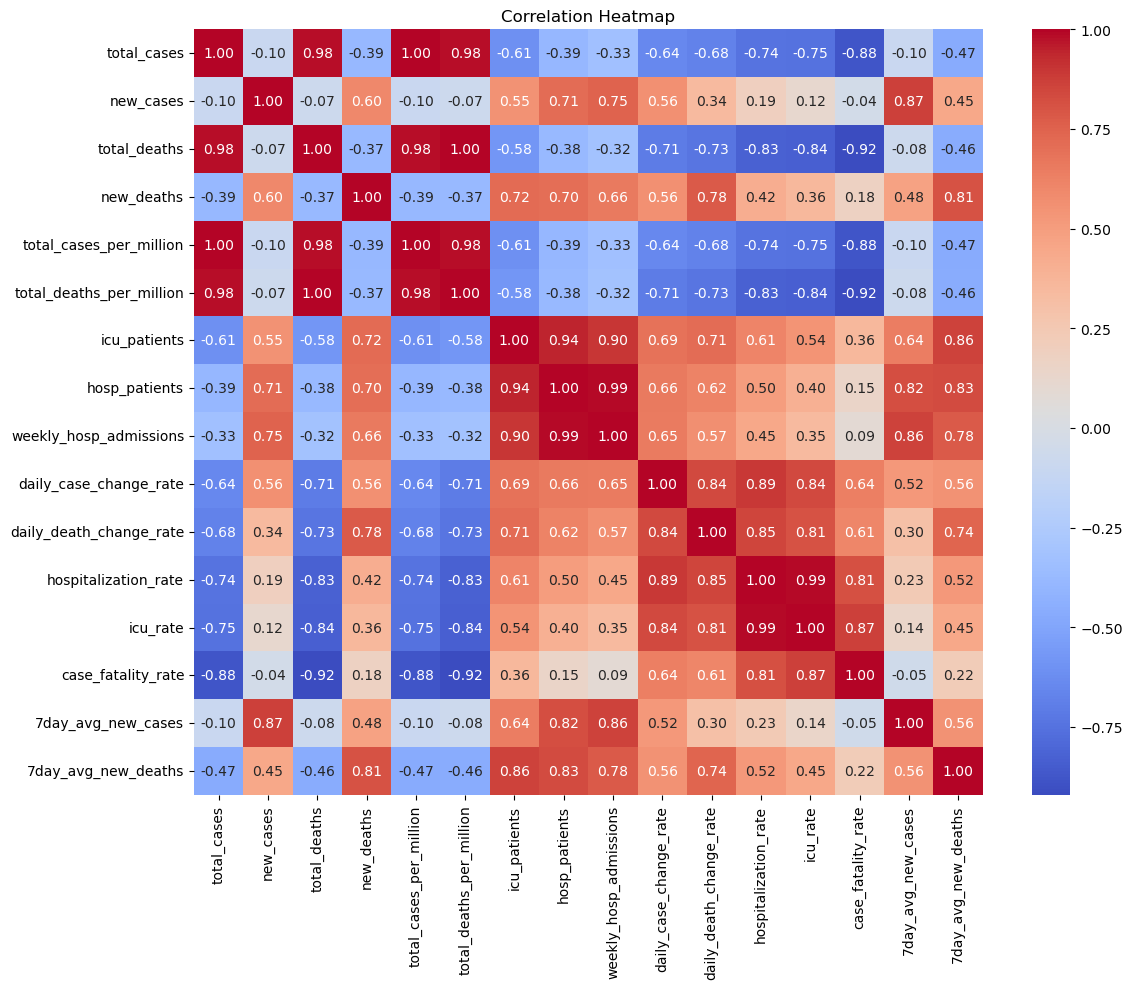

In [70]:
# Correlation heatmap for numerical features
numeric_data = covid_data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
# print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Interpretations based on correlation heatmap

High Positive Correlations:

- total_cases and total_deaths (0.98): A strong positive correlation suggests that as total cases increase, total deaths also tend to increase proportionally.
- icu_patients, hosp_patients, and weekly_hosp_admissions all show strong correlations (>0.90), indicating these hospitalization metrics are closely related.
- total_cases_per_million and total_deaths_per_million (0.98): These metrics are naturally correlated since they scale similarly across the population.

Negative Correlations:
- hospitalization_rate and total_cases (-0.74): A negative correlation suggests that hospitalization rates may decrease as total cases increase, possibly due to resource allocation or prioritization shifts.
- daily_case_change_rate and total_cases (-0.64): As the total cases accumulate, the daily growth rate tends to decrease, reflecting a "flattening" curve.

Moderate Correlations:
- new_cases and 7day_avg_new_cases (0.87): A strong, but slightly imperfect, relationship between daily new cases and the rolling 7-day average, likely due to daily fluctuations.
- new_deaths and icu_patients (0.72): The relationship between new deaths and ICU patients suggests that ICU occupancy correlates with severe outcomes.

Interesting Patterns:
- daily_death_change_rate and new_deaths (0.78): The rate of change in daily deaths correlates reasonably well with the count of new deaths, reflecting trends in severity.
- new_cases and total_cases (-0.10): A weak negative correlation suggests that the count of new cases may not strongly depend on the cumulative total, highlighting dynamic changes in the epidemic's progression.

# ICU-related Metrics

*Correlations of icu_patients:*

Positive Correlations:
- hosp_patients (0.94): This strong correlation indicates that ICU occupancy is closely related to overall hospital admissions, as expected. The number of ICU patients is a subset of the hospitalized population.
- weekly_hosp_admissions (0.90): Weekly hospital admissions also correlate strongly with ICU patients, suggesting that new admissions may contribute to ICU occupancy trends.
- new_deaths (0.72): A notable correlation shows that as ICU occupancy increases, new deaths also tend to rise. This suggests ICU occupancy is a potential indicator of severe outcomes.
- daily_death_change_rate (0.71): Indicates that fluctuations in ICU patients align with changes in daily death rates, which could reflect the severity of cases in the ICU.

Moderate Positive Correlations:
- new_cases (0.55): ICU occupancy shows a moderate correlation with new cases, which suggests that ICU occupancy is affected by recent case surges but is not a direct or immediate consequence.
- daily_case_change_rate (0.66): Suggests that changes in daily case rates have a moderate influence on ICU patient trends, indicating a delayed effect of case surges on ICU utilization.

Negative Correlations:
- total_cases (-0.61): A moderate negative correlation shows that ICU occupancy decreases as cumulative cases rise, likely reflecting shifts in the progression of the pandemic (e.g., milder cases over time, better management, or resource allocation).

*Correlations of icu_rate:*

Positive Correlations:
- hospitalization_rate (0.85): A strong correlation between ICU rates and hospitalization rates indicates that ICU utilization scales proportionally with overall hospital usage.
- icu_patients (0.99): Nearly perfect correlation, as expected, since ICU rates depend directly on ICU patient counts.

Moderate Positive Correlations:
- weekly_hosp_admissions (0.84): Weekly hospital admissions influence ICU rates but not as directly as ICU counts, suggesting some variability in hospital-to-ICU conversion rates.
- daily_case_change_rate (0.66) and daily_death_change_rate (0.65): These moderate correlations suggest that ICU rates are influenced by changes in cases and deaths, reflecting pandemic severity and hospital stress.

Negative Correlations:
- total_cases (-0.75): Similar to icu_patients, ICU rates decrease as cumulative cases grow, likely due to a decrease in the proportion of severe cases over time or improved medical interventions.
- total_deaths (-0.84): Indicates that ICU rates decline as deaths accumulate, reflecting a shift in population risk or case severity over time.


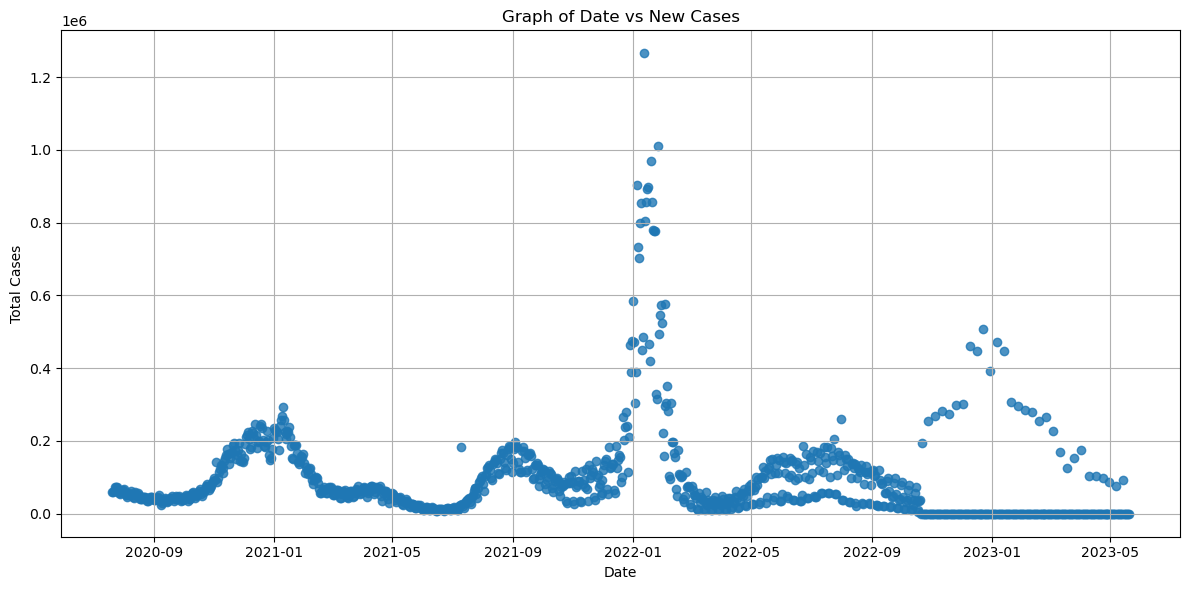

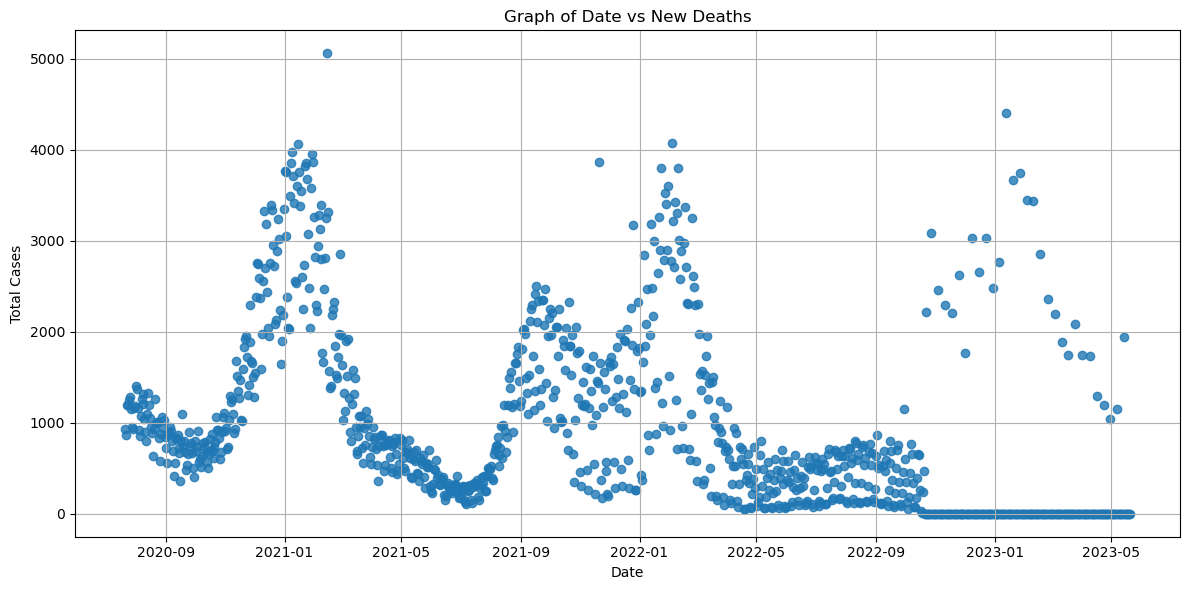

In [71]:
# Ensure the 'date' column is converted to a datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Plot the graph of date vs new_cases
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['new_cases'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs New Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the graph of date vs new_deaths
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['new_deaths'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs New Deaths')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

Over time cases increases

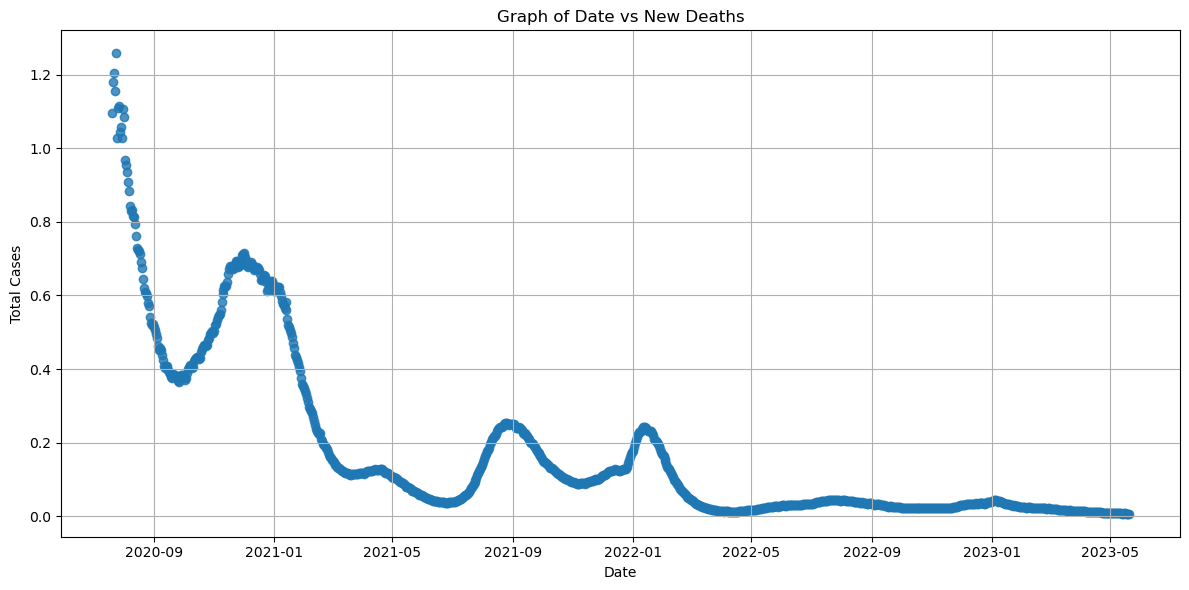

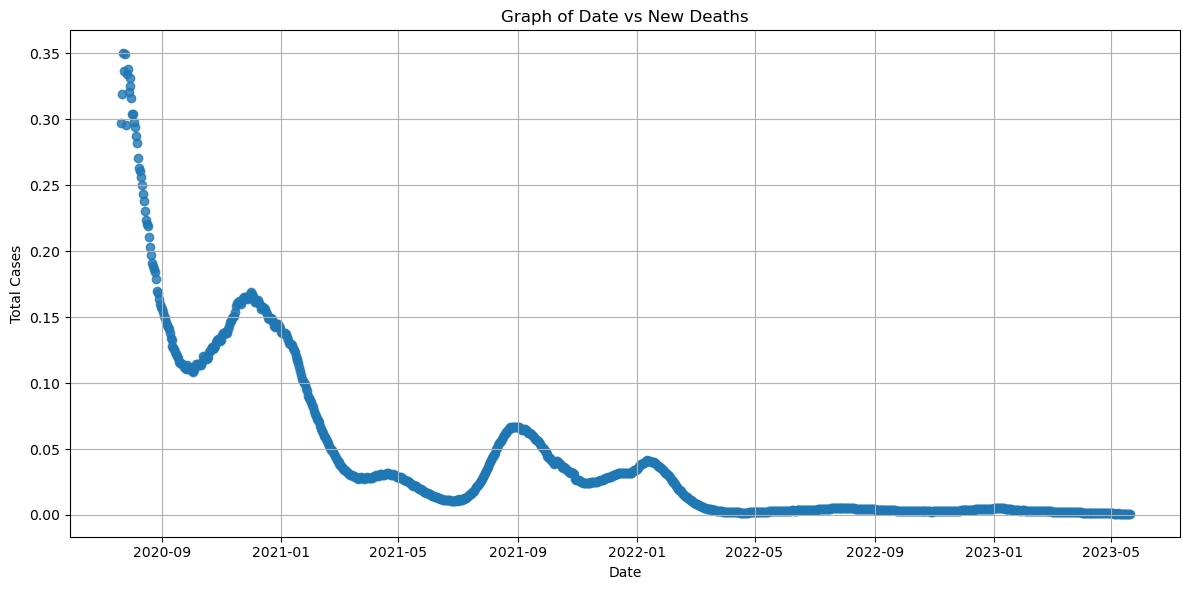

In [72]:
# Plot the graph of date vs hospitalization_rate
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['hospitalization_rate'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs New Deaths')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the graph of date vs icu_rate
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['icu_rate'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs New Deaths')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

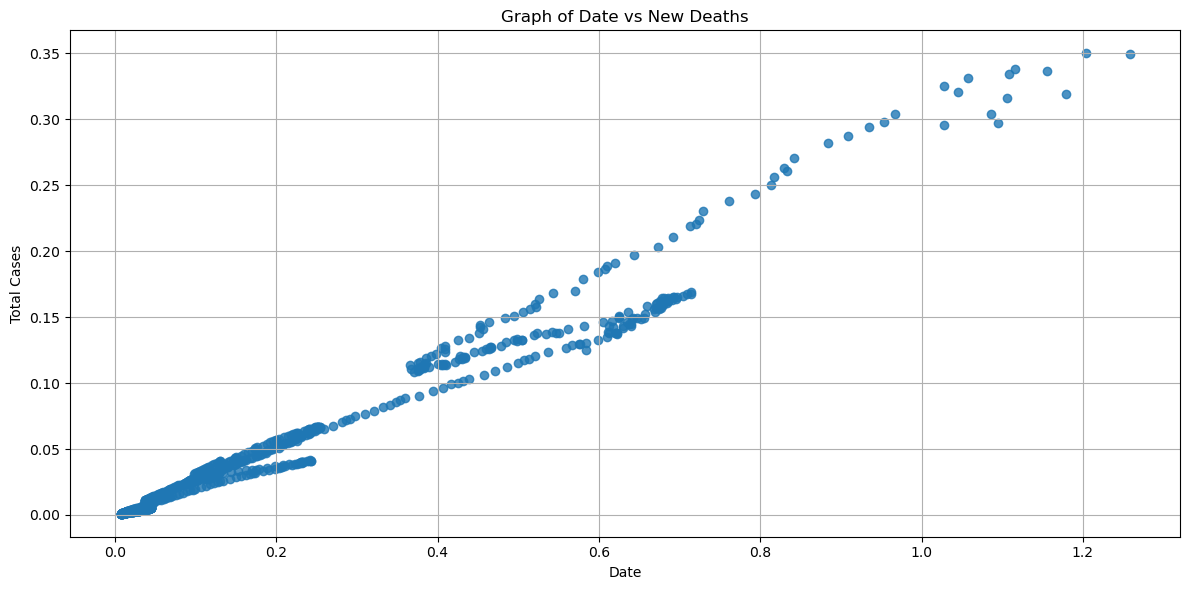

In [75]:

# Plot the graph of hospitalization_rate vs icu_rate
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['hospitalization_rate'], covid_data['icu_rate'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs New Deaths')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
# # 2. Univariate Analysis
# # Plot distributions for numerical columns
# numerical_cols = covid_data.select_dtypes(include=[np.number]).columns
# for col in numerical_cols:
#     plt.figure()
#     sns.histplot(covid_data[col].dropna(), kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

In [74]:
# 3. Categorical Data Analysis
# Inspect unique values in categorical columns to understand their distribution
categorical_cols = covid_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(covid_data[col].value_counts().head())


Unique values in hospitalization_need:
hospitalization_need
High      352
Medium    341
Low       341
Name: count, dtype: int64

Unique values in icu_requirement:
icu_requirement
High      352
Medium    341
Low       341
Name: count, dtype: int64
